### Import Needed Libraries

In [148]:
# import data handling libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import models

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [149]:
# Importing dataset

df = pd.read_csv('/content/heart-failure final data.csv')

### Data Preprocessing

In [150]:
# showing shape of data

rows, columns = df.shape

print(f"Number Of Rows : {rows}")
print(f"Number Of Columns : {columns}")

Number Of Rows : 904
Number Of Columns : 13


In [151]:
# Showing Sample of Data

df.sample(1).iloc[0]

age                             50.0
anaemia                          0.0
creatinine_phosphokinase       250.0
diabetes                         0.0
ejection_fraction               25.0
high_blood_pressure              0.0
platelets                   262000.0
serum_creatinine                 1.0
serum_sodium                   136.0
sex                              1.0
smoking                          1.0
time                           120.0
heart_failure                    0.0
Name: 551, dtype: float64

In [152]:
# Getting Some Information About Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       904 non-null    float64
 1   anaemia                   904 non-null    int64  
 2   creatinine_phosphokinase  904 non-null    int64  
 3   diabetes                  904 non-null    int64  
 4   ejection_fraction         904 non-null    int64  
 5   high_blood_pressure       904 non-null    int64  
 6   platelets                 904 non-null    float64
 7   serum_creatinine          904 non-null    float64
 8   serum_sodium              904 non-null    int64  
 9   sex                       904 non-null    int64  
 10  smoking                   904 non-null    int64  
 11  time                      904 non-null    int64  
 12  heart_failure             904 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 91.9 KB


In [153]:
# Getting Some Stats of Dataset

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,heart_failure
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,60.985991,0.446903,588.044248,0.417035,38.315265,0.363938,261299.126416,1.388230,136.640487,0.646018,0.325221,121.954646,0.330752
std,11.892873,0.497448,980.005750,0.493342,12.058236,0.481397,94402.852011,1.012765,4.417593,0.478468,0.468717,70.802027,0.470744
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.750000,0.000000,115.000000,0.000000,30.000000,0.000000,212000.000000,0.900000,134.000000,0.000000,0.000000,73.750000,0.000000
50%,60.000000,0.000000,249.000000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,109.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000,186.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [154]:
# Showing top 5 rows of data

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,heart_failure
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Showing Correlation

df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,heart_failure
age,1.000000,0.086854,-0.076687,-0.105015,0.068504,0.070655,-0.037770,0.172071,-0.048499,0.087157,0.031412,-0.205795,0.249603
anaemia,0.086854,1.000000,-0.196897,-0.015714,0.041657,0.013730,-0.038815,0.053316,0.061099,-0.116278,-0.120589,-0.124597,0.039612
creatinine_phosphokinase,-0.076687,-0.196897,1.000000,-0.009516,-0.049354,-0.084253,0.016889,-0.011204,0.051468,0.096073,0.016440,-0.009176,0.060391
diabetes,-0.105015,-0.015714,-0.009516,1.000000,-0.024732,-0.014943,0.093991,-0.022902,-0.098305,-0.157393,-0.151376,0.030503,0.010998
ejection_fraction,0.068504,0.041657,-0.049354,-0.024732,1.000000,0.028288,0.056311,-0.031379,0.170441,-0.134767,-0.066754,0.037739,-0.280596
high_blood_pressure,0.070655,0.013730,-0.084253,-0.014943,0.028288,1.000000,0.037556,-0.021755,0.032432,-0.108369,-0.039253,-0.162295,0.049760
platelets,-0.037770,-0.038815,0.016889,0.093991,0.056311,0.037556,1.000000,-0.012491,0.044728,-0.103406,0.037751,-0.001652,-0.041060
serum_creatinine,0.172071,0.053316,-0.011204,-0.022902,-0.031379,-0.021755,-0.012491,1.000000,-0.183810,0.025376,-0.041361,-0.156764,0.291142
serum_sodium,-0.048499,0.061099,0.051468,-0.098305,0.170441,0.032432,0.044728,-0.183810,1.000000,-0.033031,0.001442,0.076656,-0.178666
sex,0.087157,-0.116278,0.096073,-0.157393,-0.134767,-0.108369,-0.103406,0.025376,-0.033031,1.000000,0.454643,-0.009006,-0.000783


<Axes: >

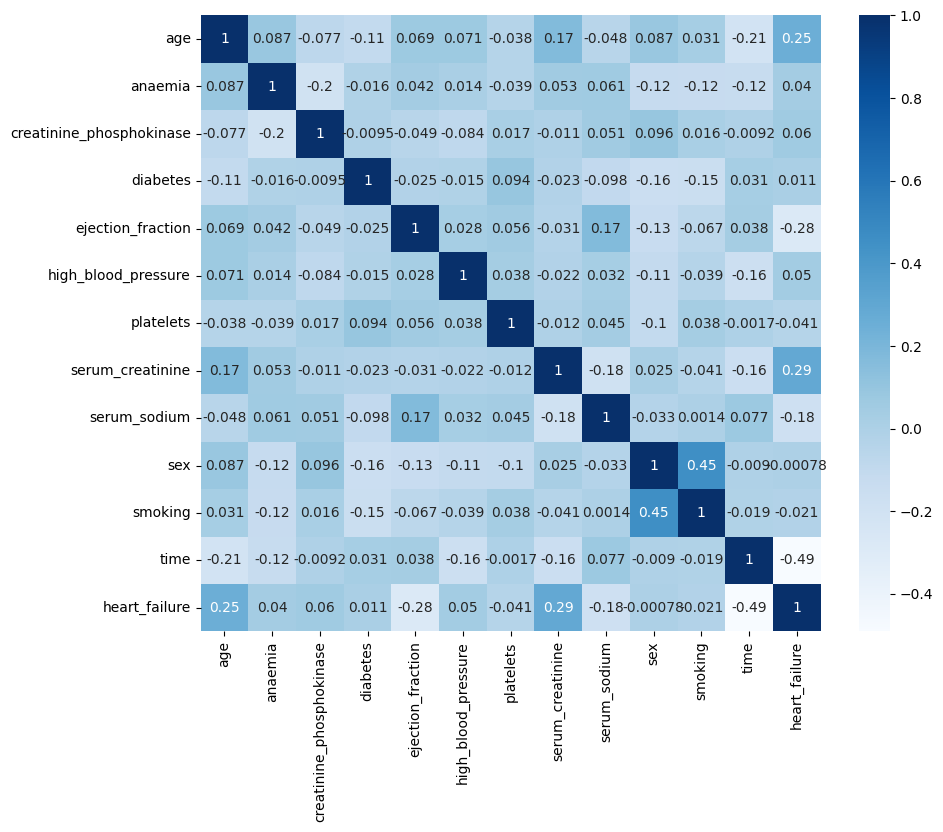

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')

***Checking if there is Null Values***

In [155]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
heart_failure               0
dtype: int64

### Feature Selection

[0.09999471 0.02725169 0.0755198  0.0338323  0.13191161 0.02512631
 0.07640958 0.12453664 0.08773373 0.02769582 0.02666249 0.26332532]


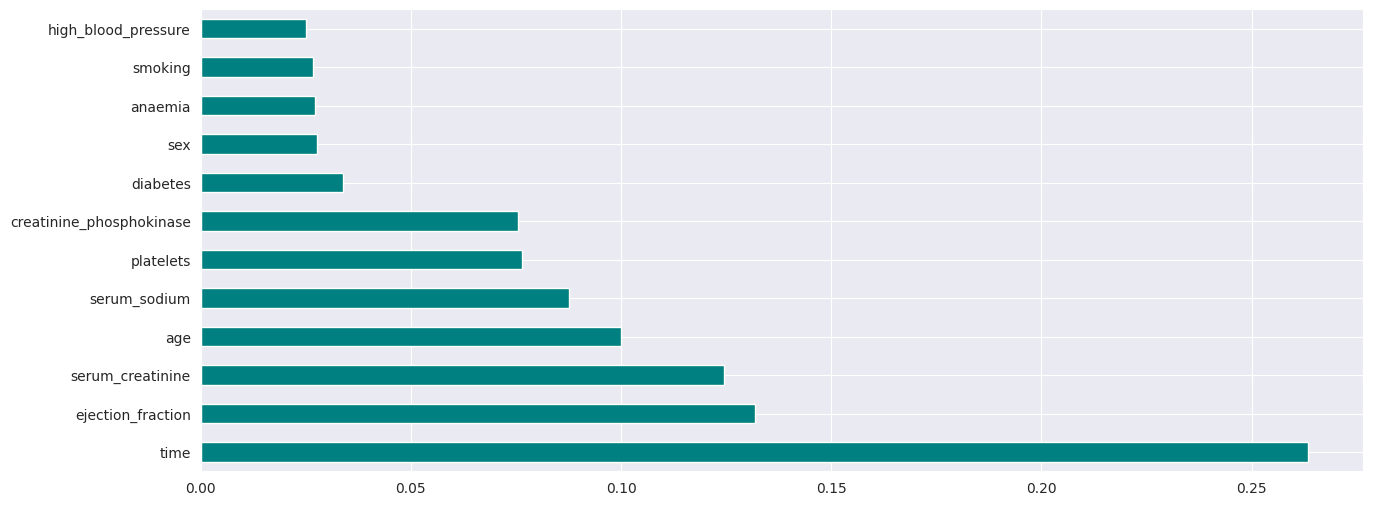

In [ ]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh', color='teal')
plt.show()

### Check Outliers

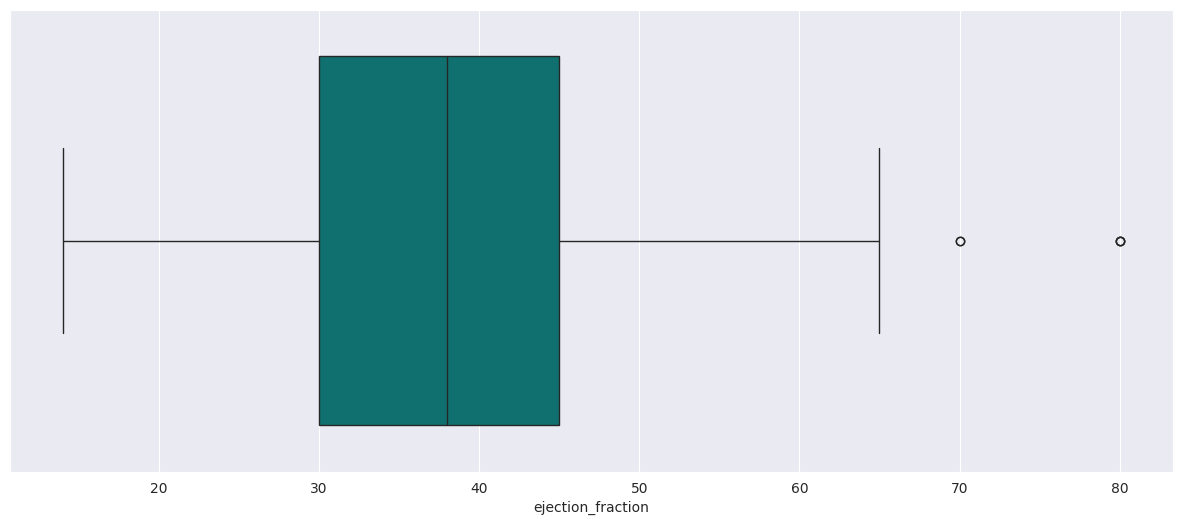

In [ ]:
# Boxplot for ejection_fraction

sns.boxplot(x = df.ejection_fraction, color='teal')
plt.show()

In [158]:
df = df[df['ejection_fraction'] < 70]

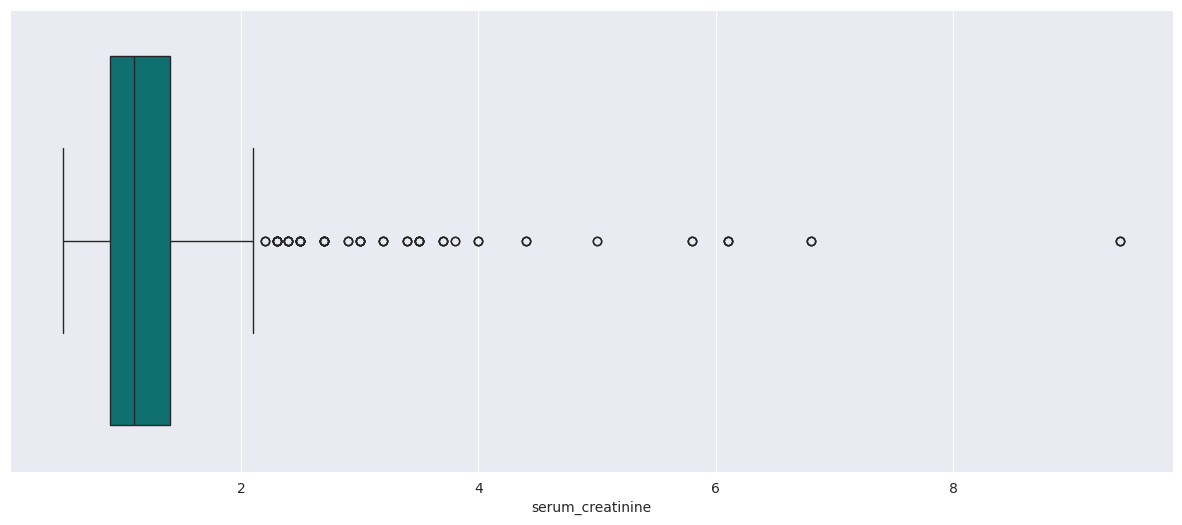

In [ ]:
# Boxplot for serum_creatinine

sns.boxplot(x = df.serum_creatinine, color='teal')
plt.show()

### Getting Some Insights of Dataset

In [ ]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by heart_failure

import plotly.express as px
fig = px.histogram(df, x="age", color="heart_failure", marginal="violin", hover_data=df.columns,
                   title ="Distribution of AGE Vs heart_failure",
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

### Checking Distribution of Features

In [ ]:
# Similarly lets get insights of other features as well
# Distribution of creatinine_phosphokinase

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by heart_failure

import plotly.express as px
fig = px.histogram(df, x="creatinine_phosphokinase", color="heart_failure", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs heart_failure",
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of ejection_fraction

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by heart_failure

import plotly.express as px
fig = px.histogram(df, x="ejection_fraction", color="heart_failure", marginal="violin", hover_data=df.columns,
                   title ="Distribution of EJECTION FRACTION Vs heart_failure",
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["heart_failure"]==0) & (df["sex"]==1)]
d2 = df[(df["heart_failure"]==1) & (df["sex"]==1)]
d3 = df[(df["heart_failure"]==0) & (df["sex"]==0)]
d4 = df[(df["heart_failure"]==1) & (df["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS heart_failure"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS heart_failure",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS heart_failure', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["heart_failure"]==0) & (df["diabetes"]==0)]
d2 = df[(df["heart_failure"]==0) & (df["diabetes"]==1)]
d3 = df[(df["heart_failure"]==1) & (df["diabetes"]==0)]
d4 = df[(df["heart_failure"]==1) & (df["diabetes"]==1)]

label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS heart_failure"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS heart_failure",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS heart_failure', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [ ]:
# "Distribution of AGE Vs DIABETES"
import plotly.express as px
fig = px.histogram(df, x="age", color="diabetes", marginal="violin",hover_data=df.columns,
                   title ="Distribution of AGE Vs DIABETES",
                   labels={"diabetes": "DIABETES", "age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [141]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["heart_failure"]==0) & (df["smoking"]==0)]
d2 = df[(df["heart_failure"]==0) & (df["smoking"]==1)]
d3 = df[(df["heart_failure"]==1) & (df["smoking"]==0)]
d4 = df[(df["heart_failure"]==1) & (df["smoking"]==1)]

label1 = ["Non-Smokers","Smokers"]
label2 = ['Non-Smokers - Survived','Smokers - Survived', "Non-Smokers -  Died", "Smokers  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="Smoking"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="Smoking VS heart_failure"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="SMOKERS  DISTRIBUTION IN THE DATASET \
                  SMOKING VS heart_failure",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='SMOKING', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='SMOKERS VS heart_failure', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()


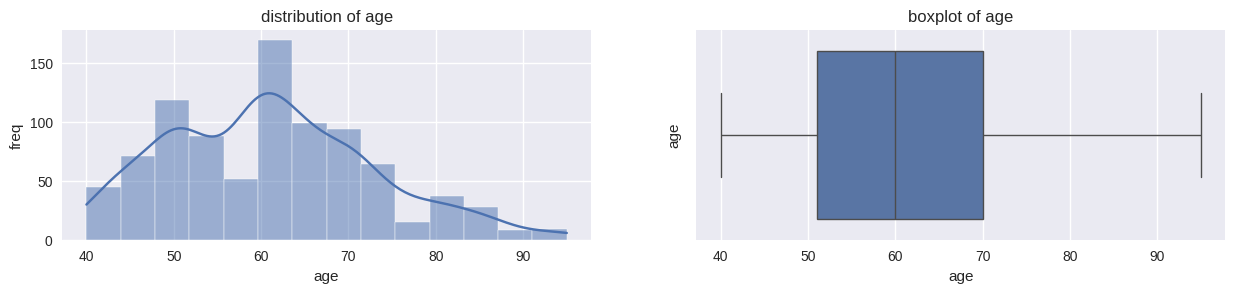

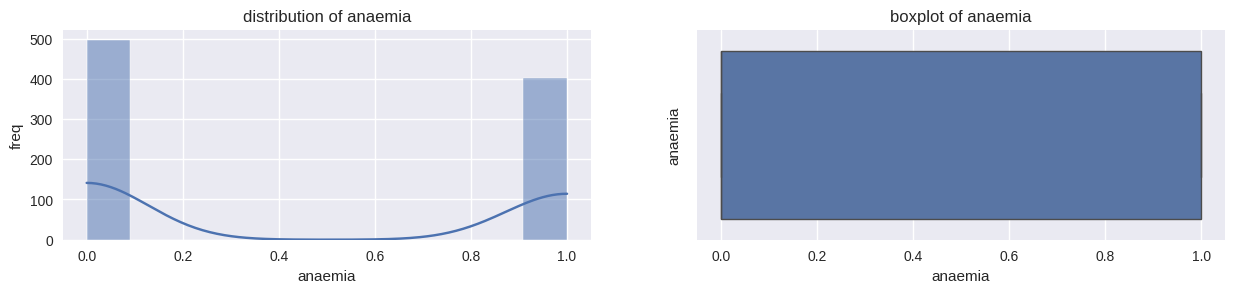

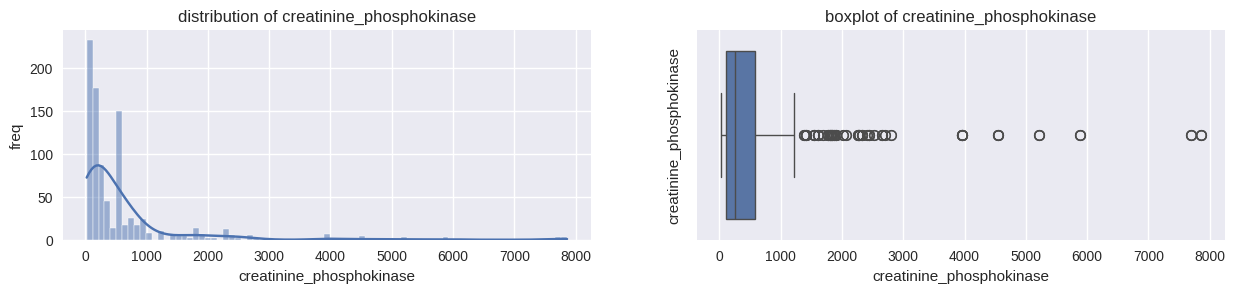

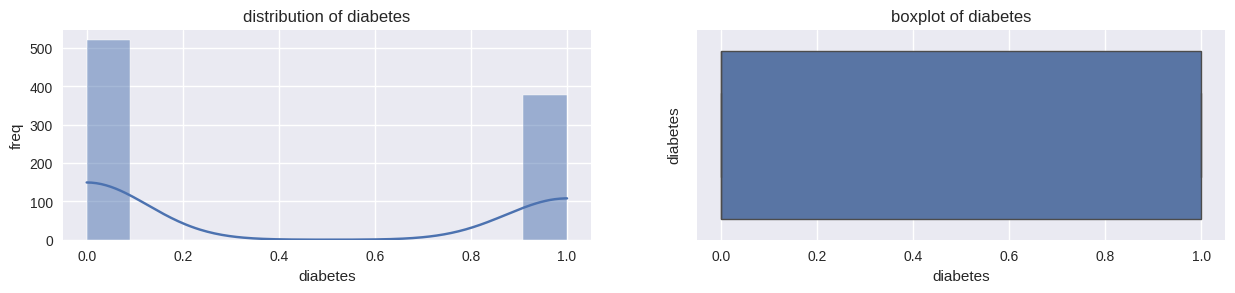

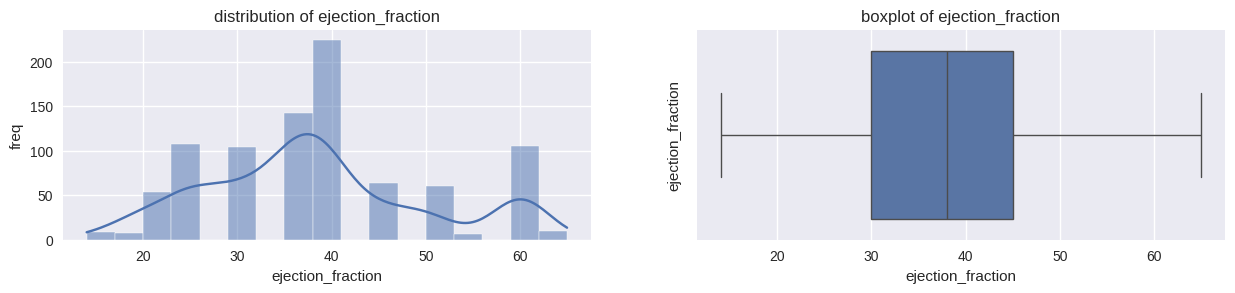

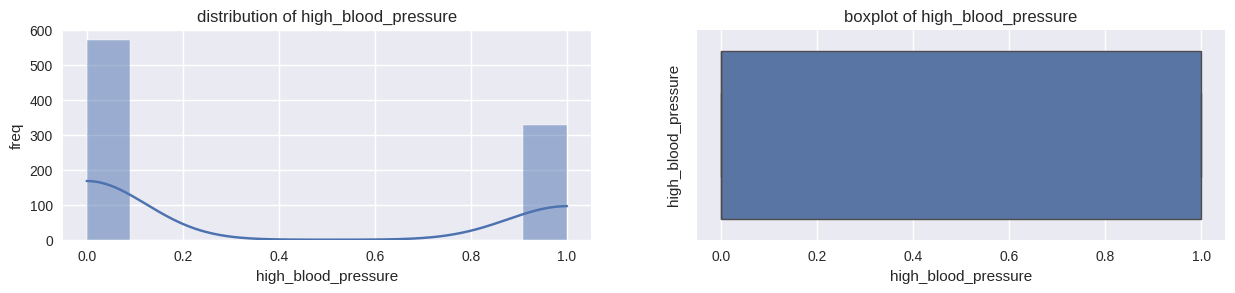

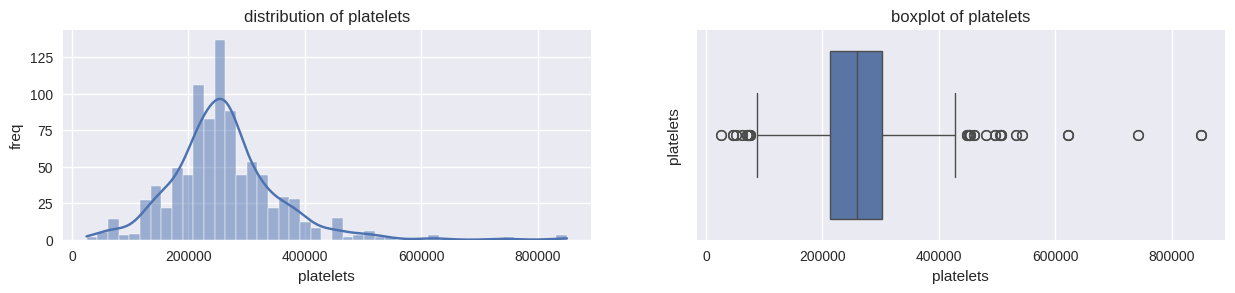

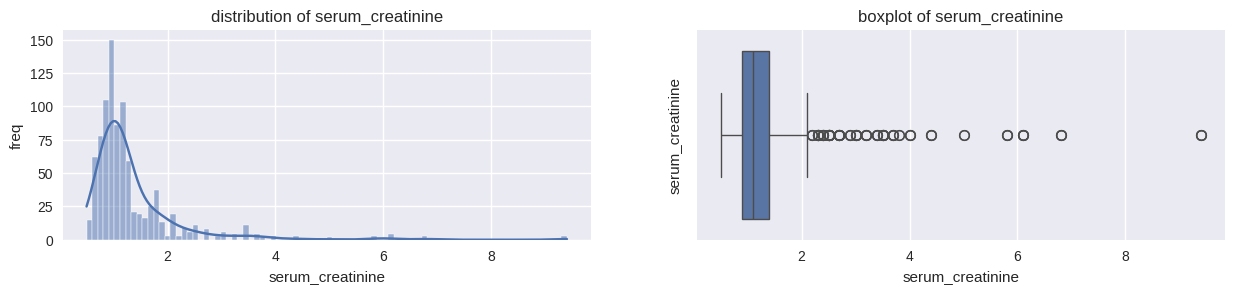

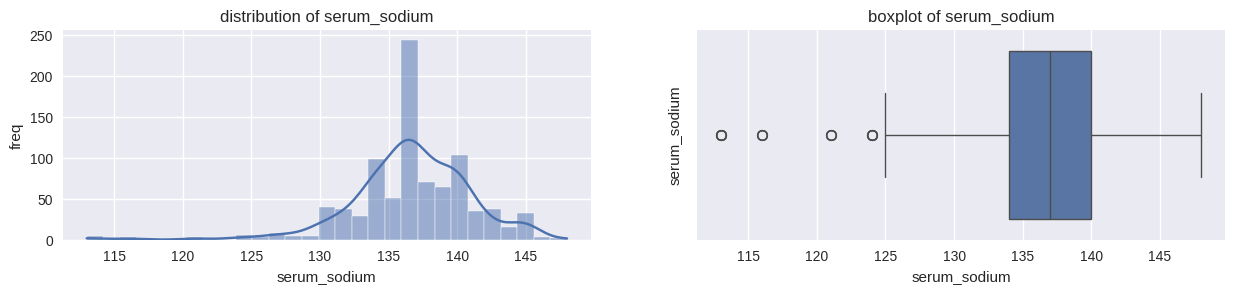

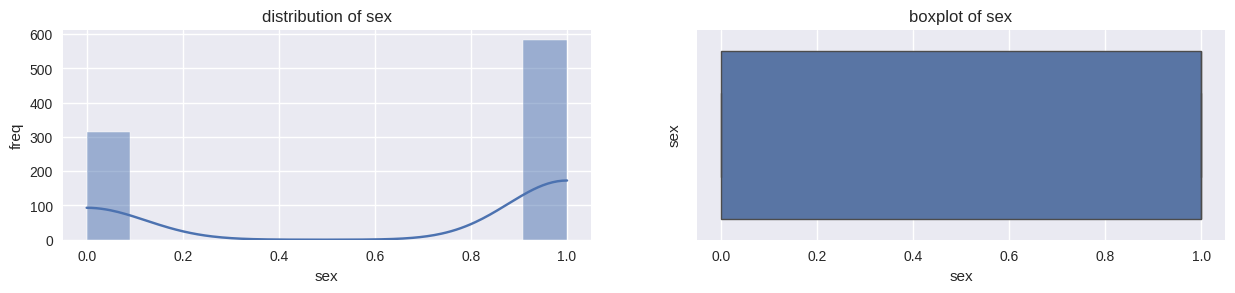

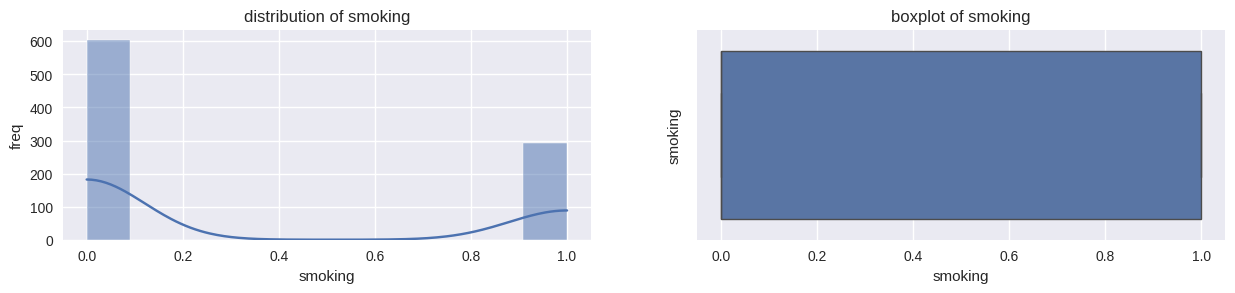

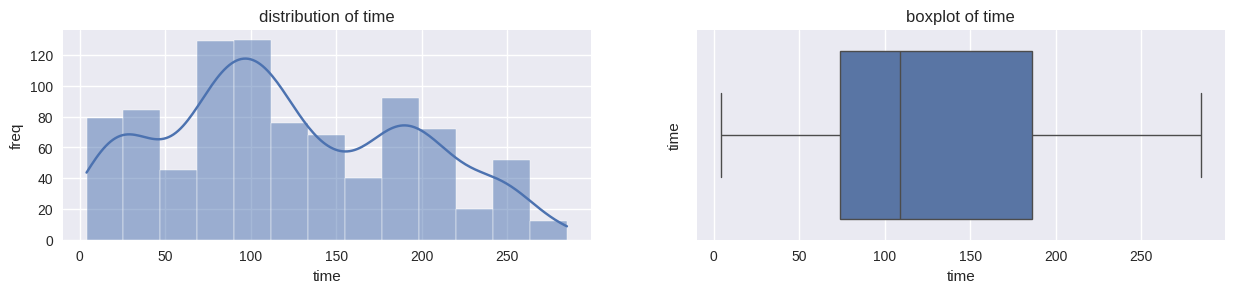

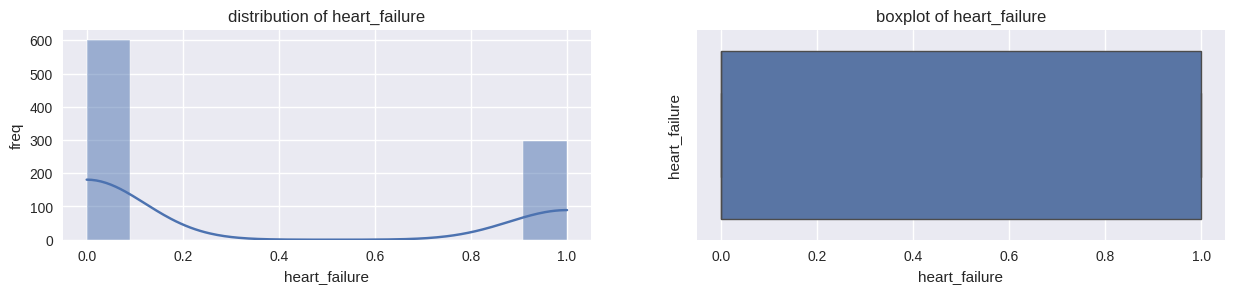

In [ ]:
plt.style.use("seaborn")
for column in df.columns:
    if df[column].dtype!="object":
        plt.figure(figsize=(15,6))
        plt.subplot(2,2,1)
        sns.histplot(data=df,x=column,kde=True)
        plt.ylabel("freq")
        plt.xlabel(column)
        plt.title(f"distribution of {column}")
        plt.subplot(2,2,2)
        sns.boxplot(data=df,x=column)
        plt.ylabel(column)
        plt.title(f"boxplot of {column}")
        plt.show()

### Splitting Data

In [ ]:
x = df.drop(["heart_failure","time"] ,axis=1)
y = df['heart_failure']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42, stratify = y)

print(f"The Shape of x_train : {x_train.shape}")
print(f"The Shape of x_test : {x_test.shape}")
print(f"The Shape of y_train : {y_train.shape}")
print(f"The Shape of y_test : {y_test.shape}")

The Shape of x_train : (719, 11)
The Shape of x_test : (180, 11)
The Shape of y_train : (719, 1)
The Shape of y_test : (180, 1)


### Logestic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       121
         1.0       0.62      0.41      0.49        59

    accuracy                           0.72       180
   macro avg       0.68      0.64      0.65       180
weighted avg       0.71      0.72      0.70       180



In [ ]:
mylist = []

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[106  15]
 [ 35  24]]
0.7222222222222222


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       121
         1.0       0.62      0.41      0.49        59

    accuracy                           0.72       180
   macro avg       0.68      0.64      0.65       180
weighted avg       0.71      0.72      0.70       180



### DECISION TREE CLASSIFIER

In [ ]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 3, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3, random_state=0)

In [ ]:
y_predd = classifier.predict(x_test)
y_predd

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[106  15]
 [ 35  24]]
0.7222222222222222


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81       121
         1.0       0.62      0.41      0.49        59

    accuracy                           0.72       180
   macro avg       0.68      0.64      0.65       180
weighted avg       0.71      0.72      0.70       180



### Support Vector Classifier (SVM)

In [ ]:
svm = SVC(C = 0.6, random_state = 42, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=0.6, random_state=42)

In [ ]:
y_pred = svm.predict(x_test)
print(y_pred)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[110  11]
 [ 39  20]]
0.7222222222222222


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.91      0.81       121
         1.0       0.65      0.34      0.44        59

    accuracy                           0.72       180
   macro avg       0.69      0.62      0.63       180
weighted avg       0.71      0.72      0.69       180



### K Nearest Neighbor

In [ ]:
kn = KNeighborsClassifier(n_neighbors=6)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = kn.predict(x_test)
print(y_pred)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[113   8]
 [ 37  22]]
0.75


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83       121
         1.0       0.73      0.37      0.49        59

    accuracy                           0.75       180
   macro avg       0.74      0.65      0.66       180
weighted avg       0.75      0.75      0.72       180



### Gradient Boosting  Classifcation

In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
y_pred = gradientboost_clf.predict(x_test)



In [ ]:
y_pred

array([1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[113   8]
 [ 12  47]]
0.8888888888888888


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       121
         1.0       0.85      0.80      0.82        59

    accuracy                           0.89       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.89      0.89      0.89       180



### XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 10, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[120   1]
 [  3  56]]
0.9777777777777777


In [159]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.008949
0:	learn: 0.6889524	total: 1.05ms	remaining: 1.05s
1:	learn: 0.6845061	total: 2.09ms	remaining: 1.04s
2:	learn: 0.6807177	total: 3.48ms	remaining: 1.16s
3:	learn: 0.6757719	total: 5ms	remaining: 1.24s
4:	learn: 0.6709875	total: 5.93ms	remaining: 1.18s
5:	learn: 0.6656711	total: 7.24ms	remaining: 1.2s
6:	learn: 0.6614801	total: 8.28ms	remaining: 1.18s
7:	learn: 0.6569325	total: 9.61ms	remaining: 1.19s
8:	learn: 0.6530960	total: 12.1ms	remaining: 1.33s
9:	learn: 0.6482995	total: 13.6ms	remaining: 1.34s
10:	learn: 0.6441804	total: 16.1ms	remaining: 1.45s
11:	learn: 0.6391247	total: 18.3ms	remaining: 1.51s
12:	learn: 0.6345761	total: 19.3ms	remaining: 1.47s
13:	learn: 0.6311080	total: 20.1ms	remaining: 1.42s
14:	learn: 0.6267834	total: 21.3ms	remaining: 1.4s
15:	learn: 0.6226924	total: 22.3ms	remaining: 1.37s
16:	learn: 0.6187829	total: 24.1ms	remaining: 1.39s
17:	learn: 0.6144439	total: 27.5ms	remaining: 1.5s
18:	learn: 0.6110712	total: 28.5ms	remaining: 1.47

In [ ]:
# pip install catboost

In [160]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.]


In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[121   0]
 [  2  57]]
0.9888888888888889


### Model Evaluation

In [ ]:
# Plotting accuracy score of different models
mylist

[0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.75,
 0.8888888888888888,
 0.9777777777777777,
 0.9888888888888889]

In [ ]:
mylist2 = ["Logestic Regression", "DecisionTree", "SupportVector", "KNearestNeighbours", "GradientBoosting", "XGBOOST","CATBOOST"]

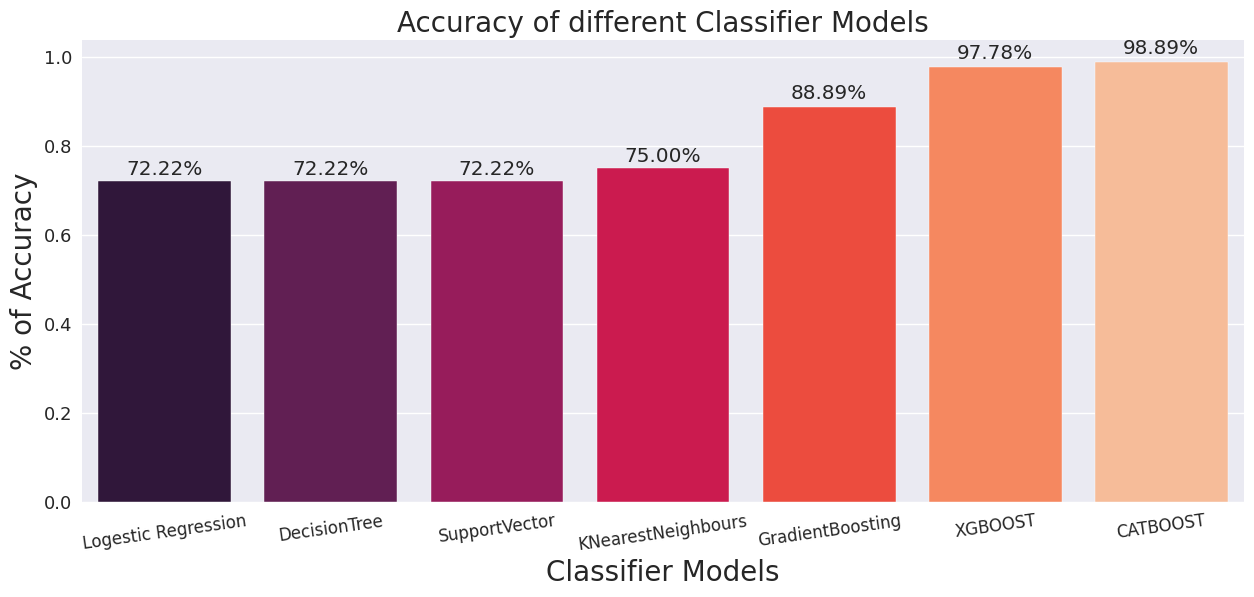

In [ ]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()